# PB-POMIS

In [56]:
import baselines.common.notebook_utils as nu
import pandas as pd
import matplotlib.pyplot as plt
import glob
from importlib import reload
reload(nu)

<module 'baselines.common.notebook_utils' from '/home/matteo/baselines/baselines/common/notebook_utils.py'>

In [57]:
plt.close('all')

In [58]:
seeds = [10, 109, 904, 160, 570, 662, 963, 100, 746, 236, 247, 689, 153,
      947, 307, 42, 950, 315, 545, 178]

In [59]:
path = '../results/pbpomis/'

## Setting:
* Batchsize = 10
* No bias
* No centering

## Cartpole

### Single IS (capacity = 1), self-normalized

In [60]:
deltas = [0.2]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*batchsize=10_*cap=1_*delta=%.4f*' % delta) for delta in deltas}
candidates_IS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}

### MULTIPLE IS (capacity = 10), row-normalized

In [61]:
deltas = [0.2]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*batchsize=10_*cap=10_*delta=%.4f*' % delta) for delta in deltas}
candidates_ROWS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}

### MULTIPLE IS (capacity = 10), all-normalized

In [62]:
deltas = [0.2]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=all*batchsize=10_*cap=10_*delta=%.4f*' % delta) for delta in deltas}
candidates_ALL = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}

### MULTIPLE IS (capacity = 10), no normalization

In [63]:
deltas = [0.2]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=none*batchsize=10_*cap=10_*delta=%.4f*' % delta) for delta in deltas}
candidates_UNN = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}

****

### Compare

single (delta = 0.2): 3547.164224 ± 1490.649154	[2849.518944, 4244.809503]	 total horizon: 177616
multi (row-normalized, delta = 0.2): 4377.670166 ± 1005.750958	[3906.964229, 4848.376104]	 total horizon: 219000
multi (normalize all, delta = 0.2): 3496.568682 ± 1683.846361	[2708.504327, 4284.633037]	 total horizon: 175066
multi (unnormalized, delta = 0.2): 131.890655 ± 6.967917	[128.629570, 135.151741]	 total horizon: 7097


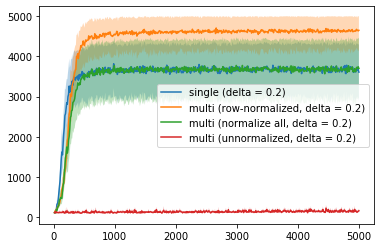

In [64]:
f = nu.compare({'single (delta = 0.2)': candidates_IS['delta=0.2000'], 
                'multi (row-normalized, delta = 0.2)': candidates_ROWS['delta=0.2000'],
                'multi (normalize all, delta = 0.2)': candidates_ALL['delta=0.2000'],
               'multi (unnormalized, delta = 0.2)': candidates_UNN['delta=0.2000']},
                bootstrap=True)